In [11]:
import numpy as np
import scipy
import scipy.stats
import nibabel as nib
import nilearn
from nilearn import surface
from nilearn import plotting
import pandas as pd
import glob
import os
import pdb
import pickle
from tqdm import tqdm, trange
from multiprocessing import Process, Manager
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge
from scipy.stats import pearsonr, zscore

from matplotlib import pyplot
from matplotlib.pyplot import *
from IPython.display import set_matplotlib_formats

import warnings
set_matplotlib_formats('png', 'pdf')


import open3d
from scipy.sparse import csc_matrix, isspmatrix
import seaborn as sns

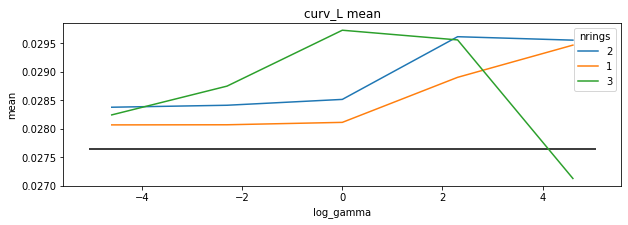

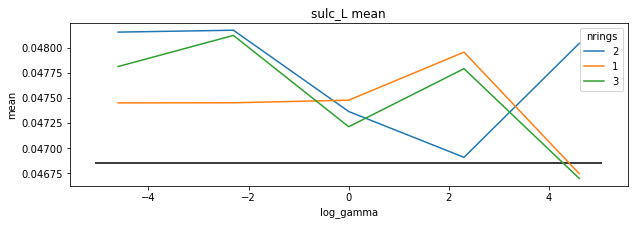

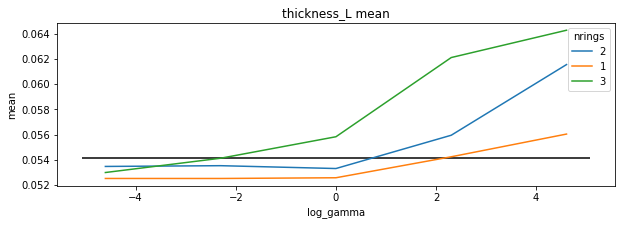

In [12]:
result_dir = "./output/SpatialReg_20210913/"
measure_list = ['curv_L', 'sulc_L', 'thickness_L']
corr_metrics = []
for measure in measure_list:
    for file in os.listdir(result_dir):
        if file.endswith(".pickle"):
            filename = os.path.join(result_dir, file)
            with open(filename, 'rb') as handle:
                result = pickle.load(handle)
            ps = file.replace('L_nring','').replace('mu','').replace('gamma','').replace('.pickle','').split('_')

            metrics = result[measure][0]['corr_metrics']
            corr_metrics.append([measure, ps[0], ps[2], metrics[0], metrics[1]])
#             print(measure, 'nrings={}, mu={}, gamma={}, mean={:.4f}, var={:.4f}'.format(ps[0], ps[1], ps[2], metrics[0], metrics[1]) )

    
result_pd = pd.DataFrame(corr_metrics, columns=['measure', 'nrings', 'gamma', 'mean', 'var'])
# result_pd['nrings'] =  pd.to_numeric(result_pd["nrings"])
result_pd['gamma'] =  pd.to_numeric(result_pd["gamma"])
result_pd['log_gamma'] =  np.log(result_pd["gamma"].values)

for measure in measure_list:
    fig, ax = pyplot.subplots(figsize=(10,3))
    sns.lineplot(data=result_pd[(result_pd['measure']==measure) & (result_pd['nrings']!='0')], x="log_gamma", y="mean", hue="nrings", ax=ax)
    ax.set_title(measure + ' mean')
    ridge = result_pd[(result_pd['measure']==measure) & (result_pd['nrings']=='0')]['mean'].values[0]
    ax.hlines(ridge, *ax.get_xlim(), 'k')
